# Lab2 : Logistic Regression  

## Overview

在這個lab會實作簡單的logistic regression
回歸，將它應用在分類的模型，利用training data 訓練完成後，再利用testing data來檢驗模型的好壞。

## Data Description

在此提供原生資料train.csv。我們的任務就是利用資料裡的欄位當成特徵值，搭配 logistic regression的計算流程去預測income，income大於50K為1，小於等於50K為0，最後利用測試資料來測準確率。<br>已經完成feature format的檔案為X_train.csv、Y_train.csv、X_test.csv、Y_test.csv。

<br>訓練資料是用來訓練模型的，而測試資料則是來評估訓練後模型的準確率。

train.csv : 原生訓練資料<br>X_train.csv: 處理後的訓練資料X，有32561筆資料，每筆資料的特徵維度(數)是106。<br>Y_train.csv: 處理後的訓練資料Ｙ，有32561筆資料，每筆資料有一個標籤。<br>X_test.csv: 處理後的測試資料Ｘ，有16281筆資料，每筆資料的特徵維度(數)是106。<br>Y_test.csv: 處理後的測試資料Ｙ，有16281筆資料，每筆資料代表一個標籤。

## 資料欄位
- income: >50K, <=50K
- age: continuous.
- workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
- fnlwgt: continuous.
- education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
- education-num: continuous.
- marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
- occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
- relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
- race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
- sex: Female, Male.
- capital-gain: continuous.
- capital-loss: continuous.
- hours-per-week: continuous.
- native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

先匯入模組去檢驗資料，我們會利用這些模組的函式幫忙取資料、做運算和畫圖等等。

In [1]:
import numpy as np
import pandas as pd
import os
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Loading data

這邊會得到各兩個訓練資料跟測試資料，每個列代表一筆資料，所以資料的總數 = 列的數，利用資料的特徵去預測income。

- train_x的維度是(32561, 106)，32561為資料數，106為特徵數。
- train_y的維度是(32561, 1)，32561為資料數，1為標籤數。
- test_x的維度是(16281, 106)，16281為資料數，106為特徵數。
- test_y的維度是(16281, 1)，16281為資料數，1為標籤數。

特徵 :資料的描述，如資料欄位中的age、workclass...。<br>
標籤 :為每筆資料要預測的目標或者正確答案，資料有多少筆就代表有多少標籤。

In [2]:
# 設定 data_path，依據放資料的資料夾去設。
dir_data = './data/'

# 讀取檔案
data = pd.read_csv(dir_data+'X_train.csv')
train_x = np.array(pd.read_csv(dir_data+'X_train.csv'))
train_y = np.array(pd.read_csv(dir_data+'Y_train.csv'))
test_x = np.array(pd.read_csv(dir_data+'X_test.csv'))
test_y = np.array(pd.read_csv(dir_data+'Y_test.csv'))
# 檢視我們的資料，這邊先呈現5筆，他會有106個欄位，也就是特徵值。
data.head()

,age,fnlwgt,sex,capital_gain,capital_loss,hours_per_week,Federal-gov,Local-gov,Never-worked,Private,...,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia,?_native_country
0,39,77516,1,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,1,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,1,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,0,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## Know how many training and test samples

許多在深度學習的錯誤來自於矩陣或向量的維度不相符。如果能了解資料的維度，可降低錯誤的發生。<br>
寫出下方的程式碼，可得知資料維度。

```
num_train : 訓練資料的數量
num_test : 測試資料的數量
```

In [3]:
# 取得長度可知道有幾筆。

# Your code here
num_train = len(train_x)
num_test = len(test_x)
# End your code

# 看訓練資料跟測試資料的維度 (資料數 , 特徵數)。
print("訓練資料的數目: num_train = " + str(num_train)) # 32561
print("測試資料的數量: num_test = " + str(num_test)) # 16281
print("train_x的維度: " + str(train_x.shape)) # (32561, 106)
print("train_y的維度: " + str(train_y.shape))# (32561, 1)
print("test_x的維度: " + str(test_x.shape)) # (16281, 106)

訓練資料的數目: num_train = 32561
測試資料的數量: num_test = 16281
train_x的維度: (32561, 106)
train_y的維度: (32561, 1)
test_x的維度: (16281, 106)


## Get the dimensions
改變訓練跟測試資料的維度變成 (特徵數，資料數)，讓資料能夠做矩陣運算。

In [4]:
# 這邊使用轉置函數T去讓去讓維度做交換。
# Your code here 
train_x = train_x.T
test_x = test_x.T
train_y = train_y.T
test_y = test_y.T
# End your code

print("\n改變後的維度")
print("train_x : " + str(train_x.shape))# (106, 32561)
print("train_y : " + str(train_y.shape))# (1, 32561)
print("test_x  : " + str(test_x.shape))# (106, 16281)
print("test_y  : " + str(test_y.shape))# (1, 16281)


改變後的維度
train_x : (106, 32561)
train_y : (1, 32561)
test_x  : (106, 16281)
test_y  : (1, 16281)


## Feature normalization (feature scaling)

特徵間的範圍會不同，所以利用特徵標準化去讓範圍一致以便更快收斂。

In [5]:
# 利用平均數跟標準差的公式算出mu跟sigma。
def compute_mean_std(X):
    """ 
    X: 訓練資料 
    mu: 平均數
    sigma: 標準差
    """  
    # Your code here
    # hint 若利用np.mean()，需加上`keepdim=True`。
    mu = np.mean(X, keepdims = True , axis=1)
    sigma = np.std(X, keepdims = True , axis=1)
    # End your code

    return mu, sigma

# 利用平均數跟標準差進行標準化。
def normalize_feat(X, mu, sigma):
    
    # Your code here
    # 寫出標準化的公式。
    normalized_X = (X - mu) / sigma
    # End your code
    return normalized_X


# Your code here
mu, sigma = compute_mean_std(train_x)
# End your code

print('前五個特徵的平均值 : \n', mu[:5])# [[3.85816468e+01] [1.89778367e+05][6.69205491e-01][1.07764884e+03][8.73038297e+01]]
print('前五個特徵的平均值和標準差 : \n', sigma[:5])#  [[1.36402231e+01][1.05548357e+05][4.70499205e-01][7.38517868e+03][4.02954031e+02]]

# 讓訓練資料跟測試資料都進行標準化。
# 測試資料的標準化的參數需跟訓練資料一樣，不然會影響預測結果。
train_x = normalize_feat(train_x, mu, sigma)
test_x = normalize_feat(test_x, mu, sigma)

前五個特徵的平均值 : 
 [[3.85816468e+01]
 [1.89778367e+05]
 [6.69205491e-01]
 [1.07764884e+03]
 [8.73038297e+01]]
前五個特徵的平均值和標準差 : 
 [[1.36402231e+01]
 [1.05548357e+05]
 [4.70499205e-01]
 [7.38517868e+03]
 [4.02954031e+02]]


## Initializing parameters 
在下方的cell進行參數初始化。我們這個lab的參數會是w跟b，w會是一個矩陣，可以利用np.zeros()來實作，而b是一個純量。

In [6]:
def initialize_with_zeros(dim):
    
    """
    這個函式會建立一個(dim, 1)維度的w，然後b會初始化為0。
    dim -- w的維度大小，也是特徵的數量。
    w -- (dim, 1)
    b -- 純量
    """
    # Your code here
    # hint : w可用np.zeros()做初始化
    w = np.zeros((dim, 1))
    b = 0
    # End your code

    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b

# 初始化參數。
dim = train_x.shape[0]
w, b = initialize_with_zeros(dim)

##   Get the cost and gradients
利用損失函數跟梯度下降來幫助訓練參數。

**Hints**:

我們會利用propagate function:

我們利用正向傳播 (Forward propagation)去算資料X的損失:
- 會有資料X，X為二維矩陣
- 去計算 : $Z = w^T X + b\quad(1)$
<br><br>
- 然後利用sigmoid函數去算預測值。
$$A = \sigma(Z) = \frac{1}{1 + e^{-Z}}\quad(2)$$    
<br><br>
- 利用損失函數去算預測值與實際值的落差。 $$L =-\frac{1}{N} [\sum_{n=1}^N y^nlog(a^n) + (1-y^n)log(1-a^n)]\quad(3)$$

更新參數的部分，可以使用以下的式子得到梯度: 

$$ \frac{\partial L}{\partial w} = \frac{1}{N}X(A-Y)^T\quad(4)$$
$$ \frac{\partial L}{\partial b} = \frac{1}{N} \sum_{i=1}^N (a^{(i)}-y^{(i)})\quad(5)$$ 

In [7]:
# 求損失
def compute_loss(A , Y) :
    '''
    A -- 預測值 (1, 訓練資料數)
    Y -- 實際值 (1, 訓練資料數)
    '''
    # 參考公式 (3)。
    # Your code here
    loss = -(Y * np.log(A) + (1 - Y) * np.log(1 - A)).mean()
    # end your code
    
    return loss

# 帶入公式 (2)，範圍會被限制在0~1之間。
def sigmoid(z) :
    # Your code here
    s = 1 / (1.0 + np.exp(-z))
    # End your code
    return s

# 算出參數 (w, b)的梯度。
def propagate(w, b, X, Y):
    
    """
    w -- (特徵數, 1)
    b -- 一個純量
    X -- data of size (特徵數, 資料數)
    Y -- 實際值 (1, 資料數)
    
    loss -- 預測值與實際值的落差。
    dw -- w的梯度，維度跟w一樣。
    db -- b的低度，維度跟b一樣。

    """
    
    N = X.shape[1]
    
    # 正向傳播，利用公式 (1)和公式 (2)求得預測值A，再利用A與Y (實際值)來求損失。
    
    # Your code here
    # 利用公式 (1)算預測值。
    Z = np.dot(w.T, X) + b
    
    # 利用公式 (2)讓預測值範圍限制在0到1之間。
    A = sigmoid(Z)
    # End your code
    
    # 限制A的範圍。
    A = np.clip(A, 1e-6, 1-1e-6)
    
    # Your code here
    # 呼叫 compute_loss()，利用預測值與實際值去算損失
    loss = compute_loss(A, Y)
    # End your code
    
    # 反向傳播，這邊會算出參數的梯度，我們之後利用此梯度來更新參數並讓損失函數最小化。
    # Your code here
    dw = np.dot(X, (A-Y).T) / N
    db = np.sum(A-Y) / N

    # End your code

    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    loss = np.squeeze(loss)
    assert(loss.shape == ())
    
    # 把參數的梯度存起來，之後會用來做更新。
    grads = {"dw": dw,
             "db": db}
    
    return grads, loss

## Predictions

利用公式(1)和公式(2)算出預測值，因為我們是要做0/1的分類，所以會再對每一筆預測值依是否大於0.5轉成0或1，這樣就可以跟實際值做比較。

In [8]:
# 算預測值
def predict(w, b, X):

    '''
    w -- (特徵數, 1)
    b -- 純量
    X -- (特徵數, 資料數)

    Y_prediction -- 為一個numpy矩陣，包含對X的預測值(0/1)。
    '''
    # 設一陣列存預測值
    m = X.shape[1]
    Y_prediction = np.zeros((1, m))

    # Your code here
    # 利用公式 (1)算預測值。
    Z = np.dot(w.T, X) + b
    # 利用公式 (2)讓預測值範圍限制在0到1之間。
    A = sigmoid(Z)
    # End your code
    
    # 預測值若大於0.5為1，反之為0，可用 np.where()來分類
    Y_prediction[0, :m] = np.where(A[0, :m] > 0.5, 1, 0)
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

## Optimization

- 計算損失跟梯度。
- 利用參數的梯度來更新參數。

目的是最小化損失函數 $L$來學習$w$ 和 $b$. 以參數 $\theta$來說, 更新規則為$ \theta = \theta - \eta \text{ } d\theta$,
其中$\eta$ 為學習率，用來調整更新的幅度。

我們會紀錄每次更新參數後對損失的影響。<br>
另外，也會呼叫predict()得到每筆資料預測值，算出每次更新參數後的準確率，並記錄起來。
我們記錄的損失跟準確率會以學習曲線的方式呈現，可看出藉由參數的更新是否會讓模型的預測效果更好。

In [9]:
# 更新參數
def optimize(w, b, X, Y, num_iterations, learning_rate, print_loss = False):
    
    """
    此函數會藉由梯度下降函式來更新w跟b。
    
    w -- (特徵數, 1)
    b -- 一個純量
    X -- data of size (特徵數, 資料數)
    Y -- 實際值 (1,資料數)
    num_iterations -- 要更新的次數。
    learning_rate -- 梯度下降的學習率。
    print_loss -- 當True，則印出損失。
    Y_prediction -- 為一個numpy矩陣，包含對X的預測值(0/1)。
    
    Returns:
    params -- 為一個dictionary (資料結構)，裡面包含w, b。
    grads -- 為一個dictionary，裡面包含dw, db。
    losses -- 為一個list，包含所有更新參數時紀錄的損失，會用來畫學習曲線。
    
    Tips:
        1) 利用propagate()去計算目前參數的損失跟梯度。
        2) 利用梯度下降的公式去更新w跟b。
    """
    
    # 用來存每次損失的值，目的是看出損失的變化。
    losses = []
    # 紀錄每筆資料的accuracy。
    accuracy_temp = 0
    # 用來存每次accuracy的值，目的是看出accuracy的變化。
    accuracy = []
 
    
    for i in range(num_iterations):

        # 呼叫propagate()計算梯度跟損失函數的值。
        # Your code here
        grads, loss = propagate(w, b, X, Y)
        # End your code
        
        # 得到各自的梯度。
        dw = grads["dw"]
        db = grads["db"]
        
        # 更新參數。
        w = w - learning_rate * dw
        b = b - learning_rate * db
        
        # 紀錄每10次epoch的損失跟準確率，epoch就是訓練的次數。
        
        if i % 10 == 0:
            
            # 會把每次的損失加進losses。
            losses.append(loss)
            
            # Your code here
            # 呼叫predict()，算出資料X的預測值。
            Y_prediction = predict(w, b, X)
            # End your code
            
             # 算準確率 : 利用求得的Y_prediction跟我們的實際值去做比較，這邊是算兩者有相同數量，再除全部的資料數。
            accuracy_temp = np.mean(Y_prediction == Y)
            
            accuracy.append(accuracy_temp)
            
        # 印出每100次epoch的損失狀況。
        if print_loss and i % 100 == 0:
            print ("Cost after iteration %i: %f" % (i, loss))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, losses , accuracy

## Merge all functions into a model

我們將前面的函式整合起來，跑一次logistic regression的流程。<br>
初始化 -> 算出梯度跟損失 -> 更新參數

In [10]:
def model(train_x, train_y, test_x, test_y, num_iterations, learning_rate, print_loss=False):
    """
    這邊建立一個logistic regression的模型來呼叫前面的函式。
    
    Arguments:
    X_train -- (特徵數, 訓練資料數)
    Y_train -- (1, 訓練資料數)
    X_test --  (特徵數, 測試資料數)
    Y_test --  (1, 測試資料數)
    num_iterations -- 要更新的次數。
    learning_rate -- 梯度下降的學習率。
    print_loss -- 當True，則印出損失。
    Y_prediction -- 為一個numpy矩陣，包含對X的預測值(0/1)。
    
    Returns:
    d -- 為一個dictionary，包含model的資訊。
    """
    # 使用initialize_with_zeros()來初始化參數，w跟b。
    w, b = initialize_with_zeros(train_x.shape[0])
    
    
    # 利用optimize()算出損失跟準確率，且算出梯度去更新參數。
    # Your code here
    params,grads,losses, accuracy = optimize(w,b,train_x,train_y,num_iterations,learning_rate,print_loss)
    # end your code
    
    # 從params中取得w跟b。
    w = params['w']
    b = params['b']
    
    # "訓練完"模型後的預測值。
    Y_prediction_train = predict(w,b,train_x)
    Y_prediction_test = predict(w,b,test_x)
    
    # 印出訓練的損失。
    print("train loss: {}".format(losses[-1]))

    # 將所有的變數全存起來。
    d = {"loss": losses,
         "accuarcy" : accuracy,
         "Y_prediction_test": Y_prediction_test,
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [11]:
d = model(train_x, train_y, test_x, test_y, num_iterations=800, learning_rate=0.5, print_loss=True)
'''
Cost after iteration 0: 0.693147
Cost after iteration 100: 0.323456
Cost after iteration 200: 0.318884
Cost after iteration 300: 0.317393
Cost after iteration 400: 0.316733
Cost after iteration 500: 0.316395
Cost after iteration 600: 0.316205
Cost after iteration 700: 0.316090
train loss: 0.3160215353350179
'''

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.323456
Cost after iteration 200: 0.318884
Cost after iteration 300: 0.317393
Cost after iteration 400: 0.316733
Cost after iteration 500: 0.316395
Cost after iteration 600: 0.316205
Cost after iteration 700: 0.316090
train loss: 0.3160215353350179


'\nCost after iteration 0: 0.693147\nCost after iteration 100: 0.323456\nCost after iteration 200: 0.318884\nCost after iteration 300: 0.317393\nCost after iteration 400: 0.316733\nCost after iteration 500: 0.316395\nCost after iteration 600: 0.316205\nCost after iteration 700: 0.316090\ntrain loss: 0.3160215353350179\n'

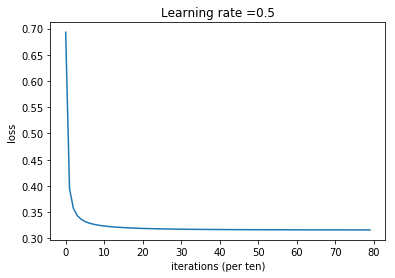

In [12]:
# 利用matplotlib來畫學習曲線 (損失)，y軸是我們的損失，x軸是訓練的次數。
loss = np.squeeze(d['loss']) 
plt.plot(loss)
plt.ylabel('loss')
plt.xlabel('iterations (per ten)') 
plt.title("Learning rate =" + str(d["learning_rate"])) 
plt.show() 

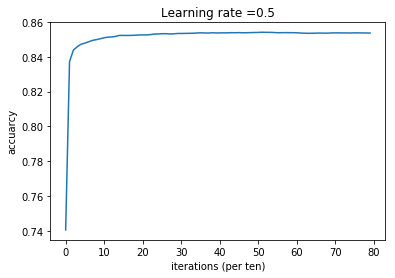

In [13]:
# 利用matplotlib來畫學習曲線 (accuracy)。
accuarcy = np.squeeze(d['accuarcy']) 
plt.plot(accuarcy)
plt.ylabel('accuarcy')
plt.xlabel('iterations (per ten)') 
plt.title("Learning rate =" + str(d["learning_rate"])) 
plt.show()

## Test phase 
最後，我們拿測試資料的預測值跟實際值做比較，準確率大約為0.85。

In [14]:
print("Accuracy : ", np.mean(d['Y_prediction_test']== test_y))

Accuracy :  0.8526503286038941
